/home/daniil/repos/anaconda2/lib/python2.7/site-packages/torch/nn/modules/module.py:360: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)
/home/daniil/repos/anaconda2/lib/python2.7/site-packages/torch/nn/functional.py:961: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


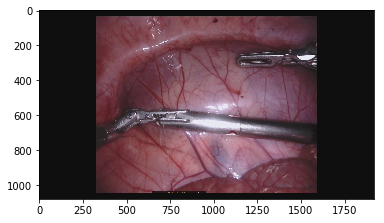

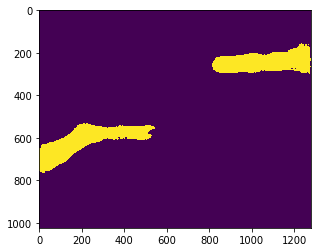

In [1]:
%matplotlib inline

import sys, os
sys.path.append("/home/daniil/repos/pytorch-segmentation-detection/")
sys.path.insert(0, '/home/daniil/repos/pytorch-segmentation-detection/vision/')

# Use second GPU -pytorch-segmentation-detection- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '1'


from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.resnet_dilated as resnet_dilated

import numpy as np


img_path = '/home/daniil/projects/endovis/dataset/instrument_dataset_2/left_frames/frame003.png'

valid_transform = transforms.Compose(
                [
                    transforms.CenterCrop((1024, 1280)),
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB')#.resize((512, 512))

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)

img = Variable(img.cuda())

fcn = resnet_dilated.Resnet18_8s(num_classes=2)
fcn.load_state_dict(torch.load('resnet_18_8s_best.pth'))
fcn.cuda()
fcn.eval()

res = fcn(img)

_, tmp = res.squeeze(0).max(0)

segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()